## Important Libraries

In [365]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential,Model,load_model
from keras.layers import Dense,Input,BatchNormalization
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## Read Data & Show it

In [322]:
data=pd.read_csv("Churn_Modelling.csv")

In [323]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Show Data Information & its Description

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [325]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Cleansing

In [326]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [327]:
data.duplicated().sum()

0

## Data Analysis and Visualization

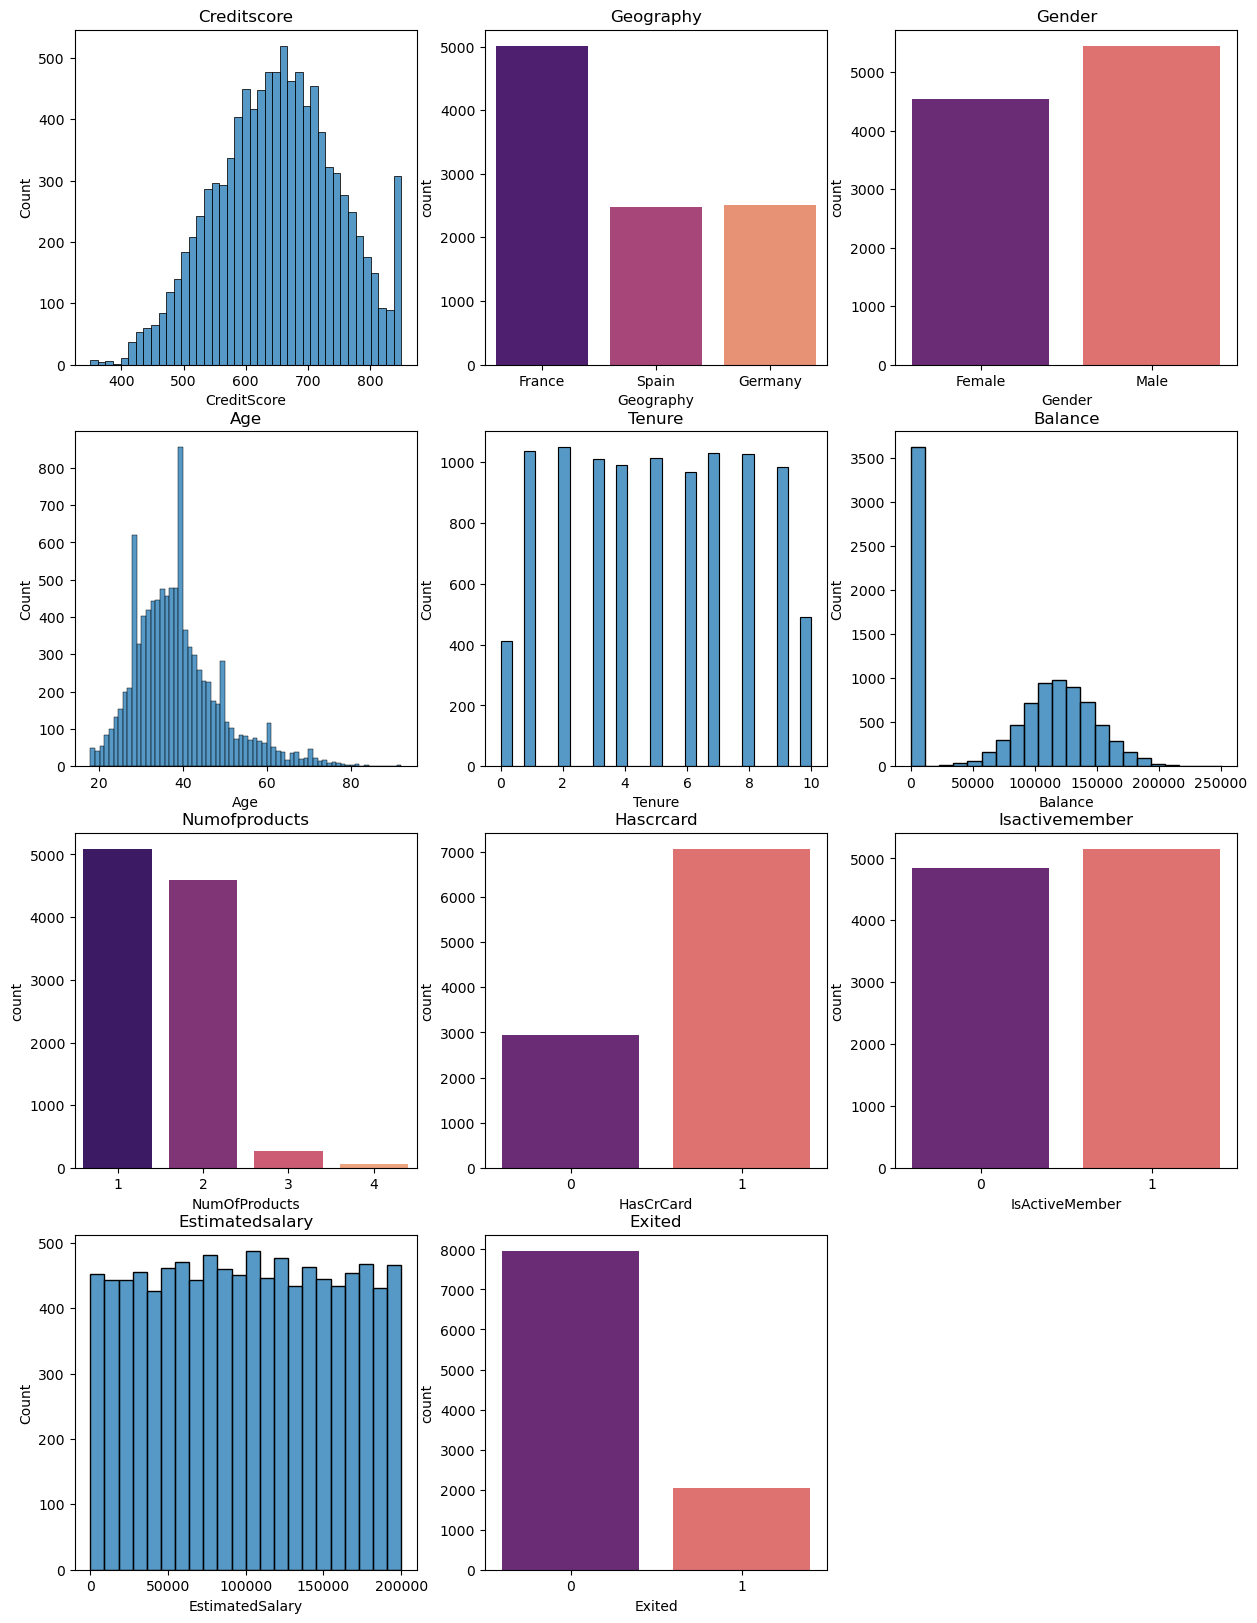

In [328]:
plt.figure(figsize=(15,20))
for col in data.columns[3:]:
    if data[col].nunique()<=10:
        plt.subplot(4,3,list(data.columns[3:]).index(col)+1)
        plt.title(col.capitalize())
        sns.countplot(data,x=col,palette='magma')
    else:
        plt.subplot(4,3,list(data.columns[3:]).index(col)+1)
        plt.title(col.capitalize())
        sns.histplot(data=data,x=col,palette='magma')
plt.show()

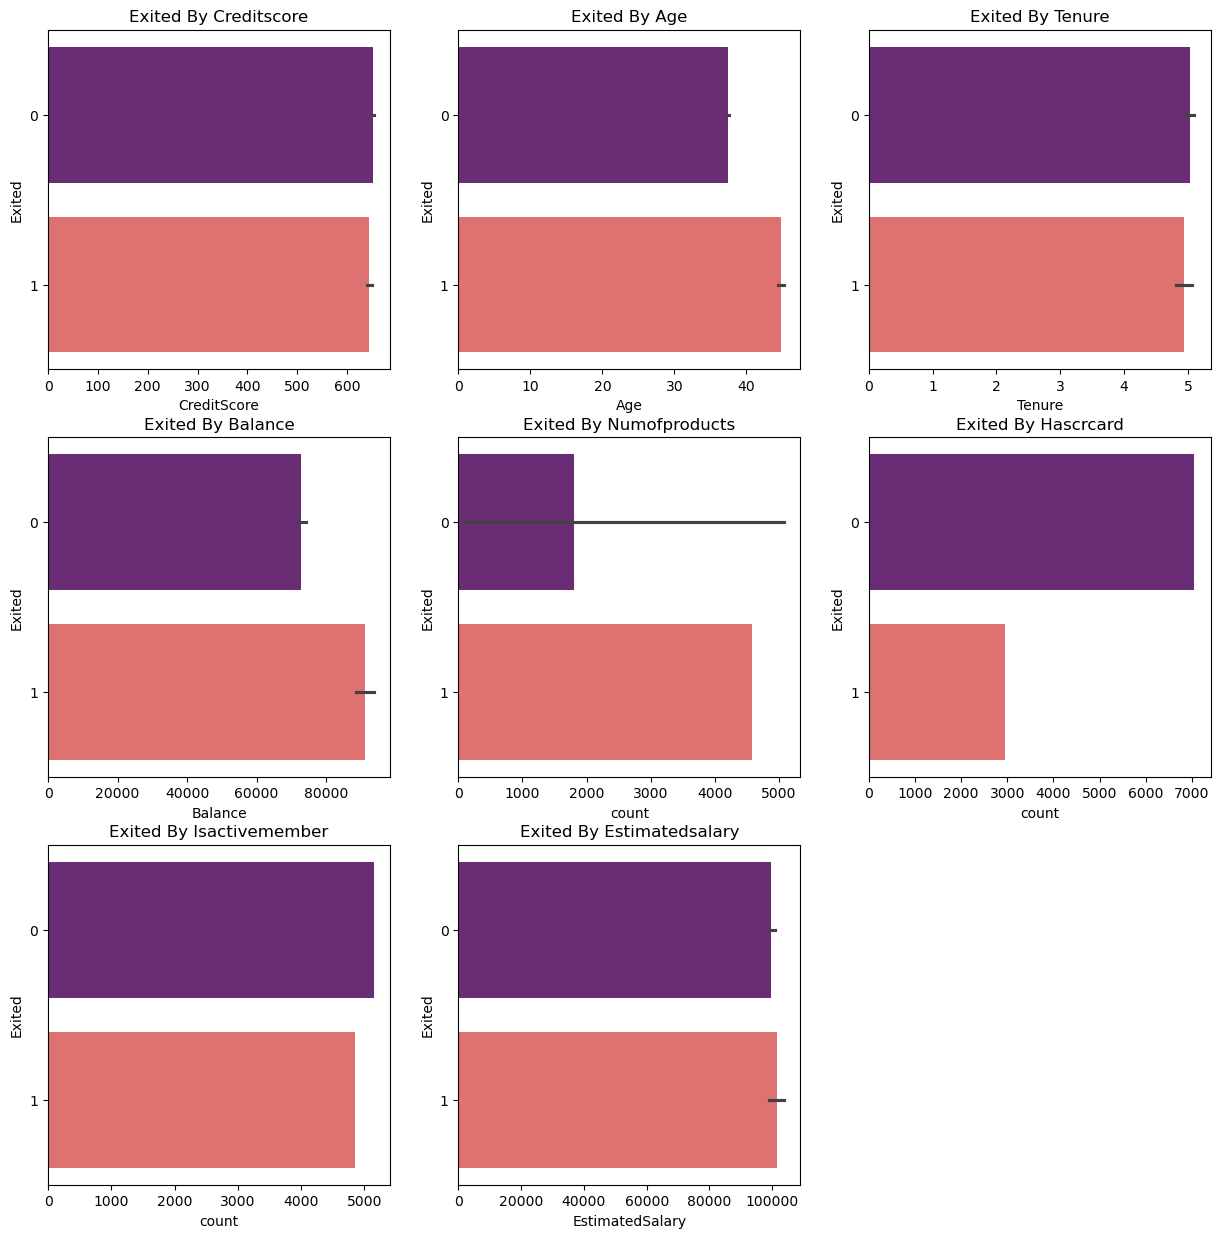

In [329]:
plt.figure(figsize=(15,15))
index_plot=1
for col in data.columns[3:-1]:
    if data[col].nunique()<=10 and type(data[col][0])!=type(" "):
        plt.subplot(3,3,index_plot)
        plt.title("Exited By "+col.capitalize())
        sns.barplot(data,x=data[col].value_counts(),y='Exited',palette='magma',orient='h')
        index_plot+=1
    elif data[col].nunique()>10 and type(data[col][0])!=type(" "):
        plt.subplot(3,3,index_plot)
        plt.title("Exited By "+col.capitalize())
        sns.barplot(data,x=col,y='Exited',palette='magma',orient='h')
        index_plot+=1
plt.show()

## Data Preprocessing

In [330]:
def label_encoders(data):
    lbls={}
    for col in data.columns:
        if type(data[col][0])==type(' '):
            label=LabelEncoder()
            data[col]=label.fit_transform(data[col])
            lbls[col]=label
    return data,lbls        

In [331]:
data,lbls=label_encoders(data)

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int32  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


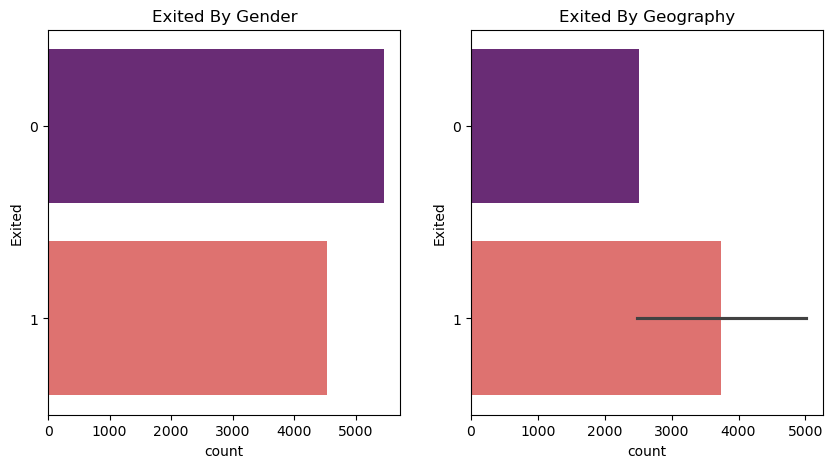

In [333]:
Labeled_cols=['Gender','Geography']
plt.figure(figsize=(10,5))
index_plot=1
for col in Labeled_cols:        
    plt.subplot(1,2,index_plot)
    plt.title("Exited By "+col.capitalize())
    sns.barplot(data,x=data[col].value_counts(),y='Exited',palette='magma',orient='h')
    index_plot+=1
plt.show()    

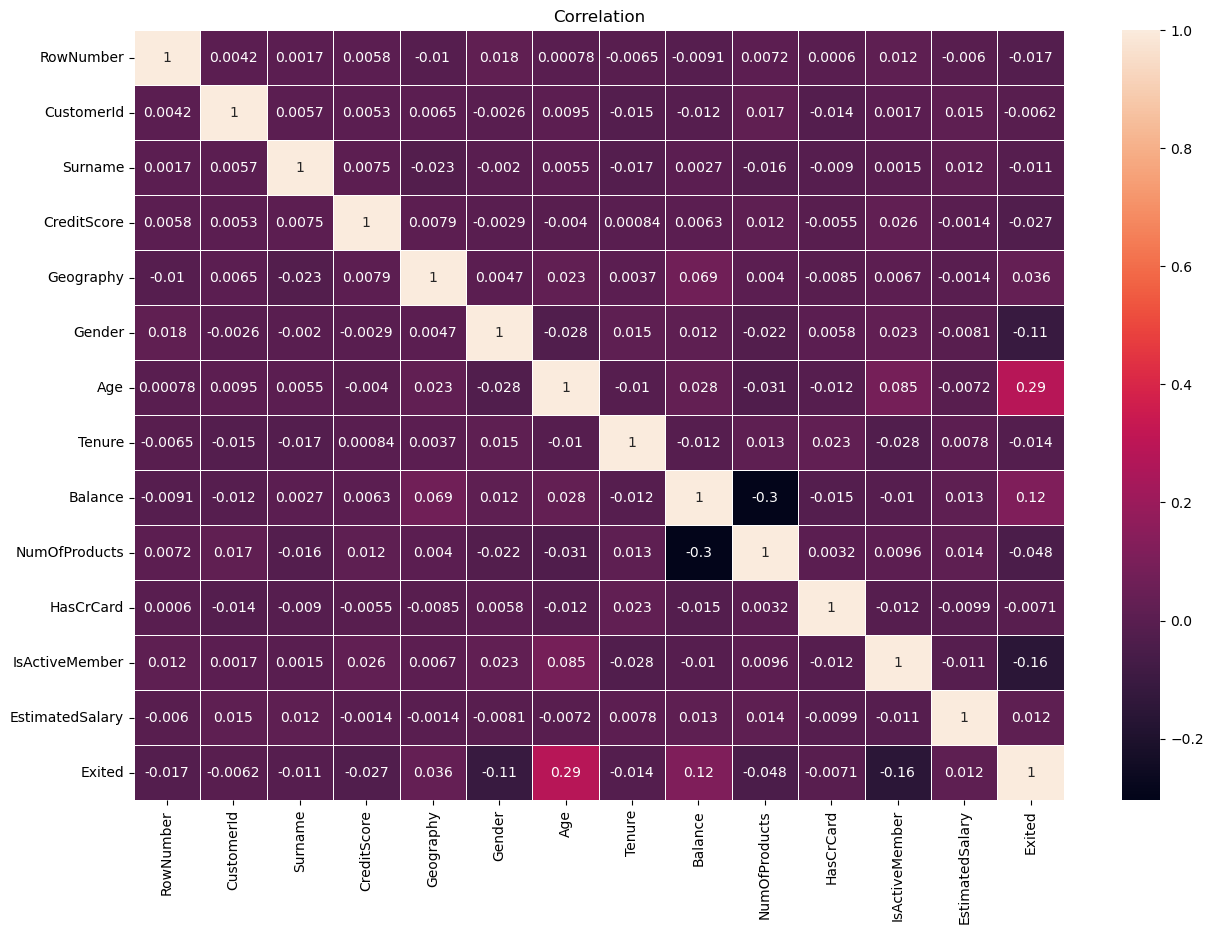

In [334]:
plt.figure(figsize=(15,10))
plt.title('Correlation')
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor='white')
plt.show()

In [335]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

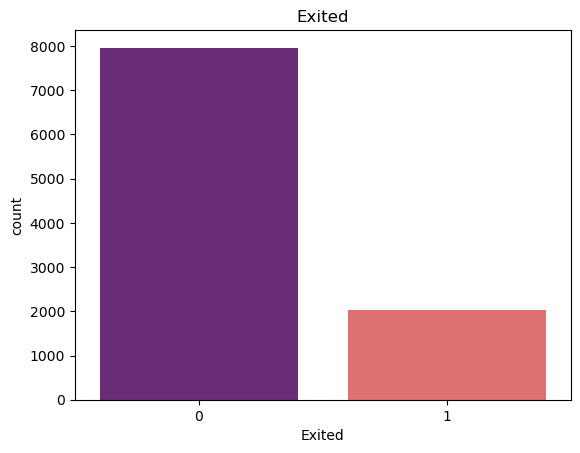

In [336]:
plt.title('Exited')
sns.countplot(data,x='Exited',palette='magma')
plt.show()

## Data Splitting 

In [337]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [338]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [339]:
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

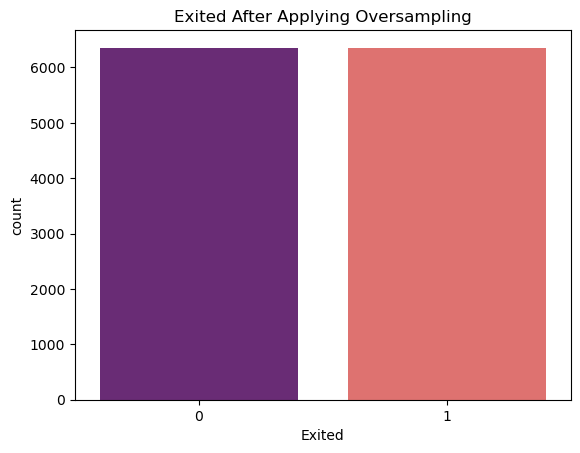

In [340]:
plt.title('Exited After Applying Oversampling')
sns.countplot(data,x=y_train_resampled,palette='magma')
plt.show()

## Saving Label Encoders 

In [341]:
pickle.dump(lbls,open('Label_Encoders.pkl','wb'))

## Loading Label Encoders

In [342]:
lbls=pickle.load(open('Label_Encoders.pkl','rb'))

## Modeling

In [343]:
input=Input(shape=(X.shape[1],))
batch=BatchNormalization()(input)

hid1=Dense(units=10,activation='relu')(batch)
hid2=Dense(units=8,activation='relu')(hid1)
hid3=Dense(units=8,activation='relu')(hid2)
hid4=Dense(units=6,activation='relu')(hid3)
hid5=Dense(units=4,activation='relu')(hid4)
hid6=Dense(units=4,activation='relu')(hid5)
hid7=Dense(units=2,activation='relu')(hid6)

out=Dense(units=1,activation='sigmoid')(hid7)

model=Model(inputs=input,outputs=out)
 
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 13)             │            52 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467 (1.82 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 26 (104.00 B)

In [344]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [345]:
cp=ModelCheckpoint( 'Churn_weights.keras',
                    monitor='val_loss',
                    save_best_only=True,
                    verbose=1)
callbacks=[cp]

In [346]:
history=model.fit(x_train_resampled,y_train_resampled,validation_split=0.15,epochs=100,batch_size=32,callbacks=callbacks)

Epoch 1/100
324/338 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5595 - loss: 0.6887
Epoch 1: val_loss improved from inf to 0.64127, saving model to Churn_weights.keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5621 - loss: 0.6881 - val_accuracy: 0.4541 - val_loss: 0.6413
Epoch 2/100
330/338 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7521 - loss: 0.5922
Epoch 2: val_loss improved from 0.64127 to 0.38488, saving model to Churn_weights.keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7524 - loss: 0.5918 - val_accuracy: 0.7567 - val_loss: 0.3849
Epoch 3/100
337/338 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7603 - loss: 0.5528
Epoch 3: val_loss did not improve from 0.38488
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7604 - loss: 0.5527 - val_accuracy: 0.7394 - val_loss: 0.4037
Epoch 4/100
329/338 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7780 - loss: 0.5210
Epoch 4: val_loss did not improve from 0.38488
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6m

## Evaluation

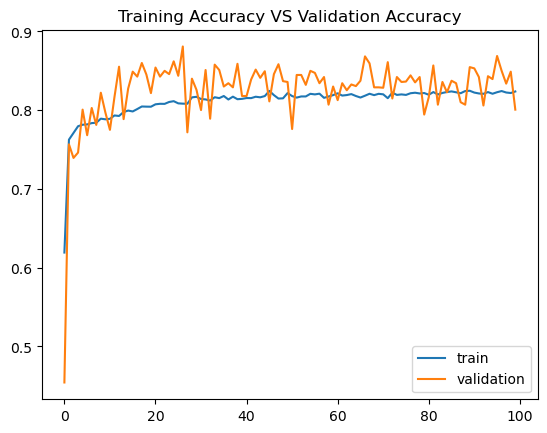

In [354]:
plt.title('Training Accuracy VS Validation Accuracy')
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

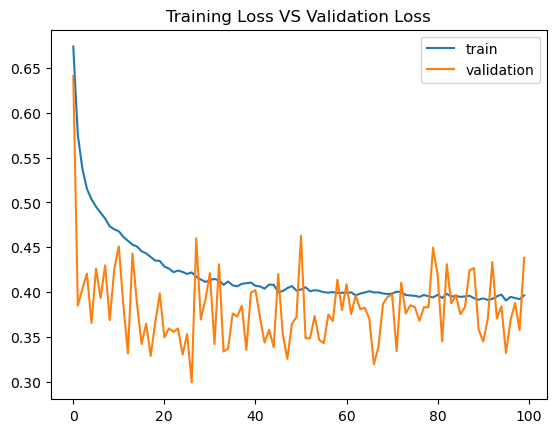

In [355]:
plt.title('Training Loss VS Validation Loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [356]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.3716


[0.3765929639339447, 0.8395000100135803]

In [362]:
y_pred=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [363]:
y_p=[]
for y in y_pred:
    if y>=0.5:
        y_p.append(1)
    else:
        y_p.append(0)    

In [364]:
y_p[:5]

[0, 0, 0, 0, 0]

In [366]:
report=classification_report(y_test,y_p)
print("Classification Report : \n"+report)

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.60      0.57      0.58       393

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.84      0.84      0.84      2000



In [367]:
conf_mat=confusion_matrix(y_test,y_p)
conf_mat

array([[1454,  153],
       [ 168,  225]], dtype=int64)

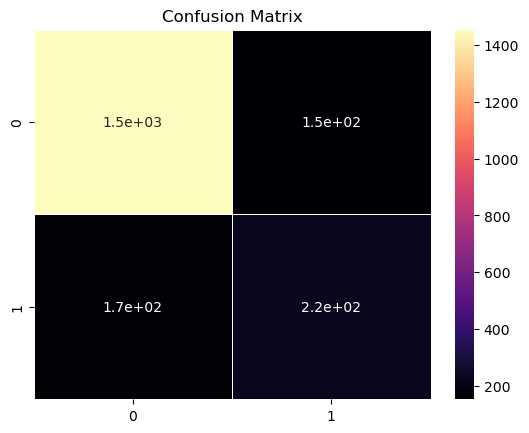

In [369]:
plt.title("Confusion Matrix")
sns.heatmap(conf_mat,linecolor='white',linewidths=0.5,cmap='magma',annot=True)
plt.show()

## Saving Model

In [357]:
model.save('Churn_Model.h5')

## Loading Model

In [ ]:
model=load_model('Churn_Model.h5')